In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

In [2]:
path = '../Resources/Data/Production_Data/psd_coffee 2.csv'
Coffee_DF = pd.read_csv(path)
Coffee_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value
0,711100,"Coffee, Green",AG,Algeria,2003,2012,6,29,Arabica Production,2,(1000 60 KG BAGS),0.0
1,711100,"Coffee, Green",AG,Algeria,2003,2012,6,90,Bean Exports,2,(1000 60 KG BAGS),0.0
2,711100,"Coffee, Green",AG,Algeria,2003,2012,6,58,Bean Imports,2,(1000 60 KG BAGS),1800.0
3,711100,"Coffee, Green",AG,Algeria,2003,2012,6,20,Beginning Stocks,2,(1000 60 KG BAGS),0.0
4,711100,"Coffee, Green",AG,Algeria,2003,2012,6,125,Domestic Consumption,2,(1000 60 KG BAGS),1805.0


In [3]:
Coffee_DF.columns


Index(['Commodity_Code', 'Commodity_Description', 'Country_Code',
       'Country_Name', 'Market_Year', 'Calendar_Year', 'Month', 'Attribute_ID',
       'Attribute_Description', 'Unit_ID', 'Unit_Description', 'Value'],
      dtype='object')

In [4]:
path = '../Resources/Data/Production_Data/country_market_months.xlsx'
month_DF = pd.read_excel(path)
month_DF.head()

,Country_Name,Month_Start,Month_End
0,Angola,4,5
1,Bolivia,4,5
2,Burundi,4,5
3,Ecuador,4,5
4,Indonesia,4,5


In [5]:
Coffee_DF = Coffee_DF.merge(month_DF, on='Country_Name')
Coffee_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Attribute_Description,Unit_ID,Unit_Description,Value,Month_Start,Month_End
0,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,Arabica Production,2,(1000 60 KG BAGS),50.0,4,5
1,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,Bean Exports,2,(1000 60 KG BAGS),1582.0,4,5
2,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,Bean Imports,2,(1000 60 KG BAGS),0.0,4,5
3,711100,"Coffee, Green",AO,Angola,1961,1960,0,20,Beginning Stocks,2,(1000 60 KG BAGS),817.0,4,5
4,711100,"Coffee, Green",AO,Angola,1961,1960,0,125,Domestic Consumption,2,(1000 60 KG BAGS),60.0,4,5


In [6]:
Attribute_Ind_DF = Coffee_DF.set_index('Attribute_Description')

In [7]:
Attribute_Ind_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,2,(1000 60 KG BAGS),50.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,2,(1000 60 KG BAGS),1582.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,2,(1000 60 KG BAGS),0.0,4,5
Beginning Stocks,711100,"Coffee, Green",AO,Angola,1961,1960,0,20,2,(1000 60 KG BAGS),817.0,4,5
Domestic Consumption,711100,"Coffee, Green",AO,Angola,1961,1960,0,125,2,(1000 60 KG BAGS),60.0,4,5


In [8]:
Arabica_Prod_DF = Attribute_Ind_DF.loc['Arabica Production',:]
Arabica_Prod_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Arabica Production,711100,"Coffee, Green",AO,Angola,1961,1960,0,29,2,(1000 60 KG BAGS),50.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1962,1961,0,29,2,(1000 60 KG BAGS),56.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1963,1962,0,29,2,(1000 60 KG BAGS),50.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1964,1963,0,29,2,(1000 60 KG BAGS),54.0,4,5
Arabica Production,711100,"Coffee, Green",AO,Angola,1965,1964,0,29,2,(1000 60 KG BAGS),50.0,4,5


In [9]:
Arabica_Prod_Y_M_sum = Arabica_Prod_DF.groupby(['Calendar_Year', 'Month_End']).sum()

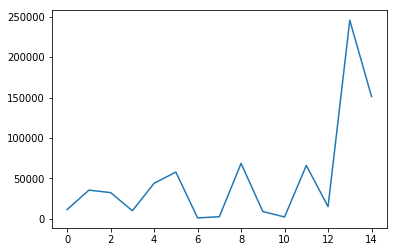

In [10]:
plt.plot(Arabica_Prod_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show
plt.savefig('Production.png')

In [11]:
Export_DF = Attribute_Ind_DF.loc['Bean Exports',:]
Export_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Bean Exports,711100,"Coffee, Green",AO,Angola,1961,1960,0,90,2,(1000 60 KG BAGS),1582.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1962,1961,0,90,2,(1000 60 KG BAGS),1950.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1963,1962,0,90,2,(1000 60 KG BAGS),2614.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1964,1963,0,90,2,(1000 60 KG BAGS),2434.0,4,5
Bean Exports,711100,"Coffee, Green",AO,Angola,1965,1964,0,90,2,(1000 60 KG BAGS),2305.0,4,5


In [12]:
Export_Y_M_sum = Export_DF.groupby(['Calendar_Year', 'Month_End']).sum()

In [13]:
Export_Y_M_sum

Commodity_Code  Market_Year  Month  Attribute_ID  \
Calendar_Year Month_End                                                     
1959          10                1422200         3920      0           180   
1960          5                 6399900        17649      0           810   
              7                 4266600        11766      0           540   
              10               19910800        54908      0          2520   
1961          5                 6399900        17658      0           810   
              7                 4266600        11772      0           540   
              10               19910800        54936      0          2520   
1962          5                 6399900        17667      0           810   
              7                 4266600        11778      0           540   
              10               19910800        54964      0          2520   
1963          5                 6399900        17676      0           810   
              7                 4266600        11784      0           540   
              10               19910800        54992      0          2520   
1964          5                 6399900        17685      0           810   
              7                 4266600        11790      0           540   
              10               19910800        55020      0          2520   
1965          5                 6399900        17694      0           810   
              7                 4266600        11796      0           540   
              10               19910800        55048      0          2520   
1966          5                 6399900        17703      0           810   
              7                 4266600        11802      0           540   
              10               19910800        55076      0          2520   
1967          5                 6399900        17712      0           810   
              7                 4266600        11808      0           540   
              10               19910800        55104      0          2520   
1968          5                 6399900        17721      0           810   
              7                 4266600        11814      0           540   
              10               19910800        55132      0          2520   
1969          5                 6399900        17730      0           810   
              7                 4266600        11820      0           540   
...                                 ...          ...    ...           ...   
2008          10                7111000        20039     60           900   
2009          7                  711100         2008      6            90   
              10                2844400         8023     36           360   
2010          5                34843900        98328    354          4410   
              7                12088700        34108    108          1530   
              10               52621400       148478    576          6660   
2011          5                 6399900        18094     78           810   
              7                 2133300         6031     18           270   
              10               14222000        40190    186          1800   
2012          5                 7822100        22086     78           990   
              7                 5688800        16067     54           720   
              10               44799300       126474    474          5670   
2013          5                 7822100        22133     96           990   
              7                 2844400         8048     24           360   
              10               22044100        62336    240          2790   
2014          5                 7822100        22150    102           990   
              7                 5688800        16098     48           720   
              10               27732900        78412    294          3510   
2015          5                 4266600        12089     54           540   
              7      

<function matplotlib.pyplot.show>

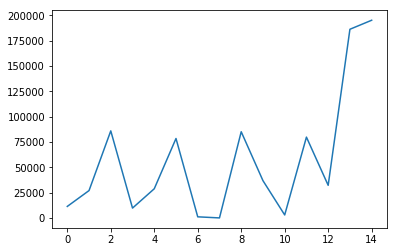

In [14]:
plt.plot(Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show


In [15]:
Import_DF = Attribute_Ind_DF.loc['Bean Imports',:]
Import_DF.head()

,Commodity_Code,Commodity_Description,Country_Code,Country_Name,Market_Year,Calendar_Year,Month,Attribute_ID,Unit_ID,Unit_Description,Value,Month_Start,Month_End
Attribute_Description,,,,,,,,,,,,,
Bean Imports,711100,"Coffee, Green",AO,Angola,1961,1960,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1962,1961,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1963,1962,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1964,1963,0,58,2,(1000 60 KG BAGS),0.0,4,5
Bean Imports,711100,"Coffee, Green",AO,Angola,1965,1964,0,58,2,(1000 60 KG BAGS),0.0,4,5


In [16]:
Import_Y_M_sum = Import_DF.groupby(['Calendar_Year', 'Month_End']).sum()

In [17]:
Import_Y_M_sum.head()

Commodity_Code  Market_Year  Month  Attribute_ID  \
Calendar_Year Month_End                                                     
1959          10                1422200         3920      0           116   
1960          5                 6399900        17649      0           522   
              7                 4266600        11766      0           348   
              10               19910800        54908      0          1624   
1961          5                 6399900        17658      0           522   

                         Unit_ID  Value  Month_Start  
Calendar_Year Month_End                               
1959          10               4    0.0           18  
1960          5               18   35.0           36  
              7               12   15.0           36  
              10              56  157.0          252  
1961          5               18   29.0           36

<function matplotlib.pyplot.show>

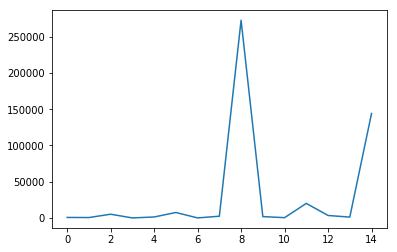

In [18]:
plt.plot(Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.show

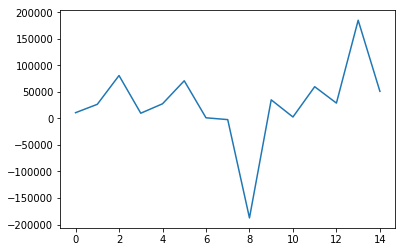

In [19]:
plt.plot(Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values - Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018],'Value'].values)
plt.savefig('trade_impalance.png')
plt.show()


In [20]:
Trade_Balance = Export_Y_M_sum.loc[:,'Value'].values - Import_Y_M_sum.loc[:,'Value'].values
print(Trade_Balance.shape)
index = Import_Y_M_sum.index
Trade_Balance_DF = pd.DataFrame(Trade_Balance, index=index, columns=['Trade Balance'])
Trade_Balance_DF.head()

(170,)


Trade Balance
Calendar_Year Month_End               
1959          10                   0.0
1960          5                 4392.0
              7                17292.0
              10               19863.0
1961          5                 5444.0

In [21]:
Import_Y_M_sum = Import_Y_M_sum.rename(columns={'Value': 'Import'})
Export_Y_M_sum = Export_Y_M_sum.rename(columns={'Value': 'Export'})
Arabica_Prod_Y_M_sum = Arabica_Prod_Y_M_sum.rename(columns={'Value': 'Production'})
Import_Y_M_sum.head()

Commodity_Code  Market_Year  Month  Attribute_ID  \
Calendar_Year Month_End                                                     
1959          10                1422200         3920      0           116   
1960          5                 6399900        17649      0           522   
              7                 4266600        11766      0           348   
              10               19910800        54908      0          1624   
1961          5                 6399900        17658      0           522   

                         Unit_ID  Import  Month_Start  
Calendar_Year Month_End                                
1959          10               4     0.0           18  
1960          5               18    35.0           36  
              7               12    15.0           36  
              10              56   157.0          252  
1961          5               18    29.0           36

In [22]:
Import_Y_M_sum = Import_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Import']
Export_Y_M_sum = Export_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Export']
Arabica_Prod_Y_M_sum = Arabica_Prod_Y_M_sum.loc[[2013, 2014, 2015, 2016, 2018], 'Production']
Trade_Balance_DF = Trade_Balance_DF.loc[[2013, 2014, 2015, 2016, 2018], 'Trade Balance']

In [23]:
Trade_DF = Import_Y_M_sum.to_frame().merge(Export_Y_M_sum.to_frame(), left_index=True, right_index=True)
Trade_DF.head()

Import   Export
Calendar_Year Month_End                 
2013          5           650.0  11487.0
              7           510.0  27123.0
              10         5100.0  86016.0
2014          5             0.0   9847.0
              7          1290.0  28901.0

In [24]:
Trade_DF = Trade_DF.merge(Arabica_Prod_Y_M_sum.to_frame(), left_index=True, right_index=True)

In [25]:
Trade_DF.head()

Import   Export  Production
Calendar_Year Month_End                             
2013          5           650.0  11487.0     11615.0
              7           510.0  27123.0     35595.0
              10         5100.0  86016.0     32540.0
2014          5             0.0   9847.0     10100.0
              7          1290.0  28901.0     44070.0

In [26]:
Trade_DF = Trade_DF.merge(Trade_Balance_DF.to_frame(), left_index=True, right_index=True)
Trade_DF.head()

Import   Export  Production  Trade Balance
Calendar_Year Month_End                                            
2013          5           650.0  11487.0     11615.0        10837.0
              7           510.0  27123.0     35595.0        26613.0
              10         5100.0  86016.0     32540.0        80916.0
2014          5             0.0   9847.0     10100.0         9847.0
              7          1290.0  28901.0     44070.0        27611.0

In [27]:
Trade_DF.reset_index(inplace=True)
Trade_DF.head()

,Calendar_Year,Month_End,Import,Export,Production,Trade Balance
0,2013,5,650.0,11487.0,11615.0,10837.0
1,2013,7,510.0,27123.0,35595.0,26613.0
2,2013,10,5100.0,86016.0,32540.0,80916.0
3,2014,5,0.0,9847.0,10100.0,9847.0
4,2014,7,1290.0,28901.0,44070.0,27611.0


In [28]:
Trade_DF['Calendar_Year'] = Trade_DF['Calendar_Year'].astype(str)
Trade_DF['Month_End'] = Trade_DF['Month_End'].astype(str)
Trade_DF.dtypes

Calendar_Year     object
Month_End         object
Import           float64
Export           float64
Production       float64
Trade Balance    float64
dtype: object

In [29]:
dates =[]
for i in range(len(Trade_DF)):
    x = Trade_DF.iloc[i,0] + '-' + Trade_DF.iloc[i,1] + '-' + '01'
    dates.append(x)

In [30]:
dates_df = pd.DataFrame({'Dates': dates})

In [31]:
Trade_DF = Trade_DF.merge(dates_df, left_index=True, right_index=True)

In [32]:
Trade_DF.head()

,Calendar_Year,Month_End,Import,Export,Production,Trade Balance,Dates
0,2013,5,650.0,11487.0,11615.0,10837.0,2013-5-01
1,2013,7,510.0,27123.0,35595.0,26613.0,2013-7-01
2,2013,10,5100.0,86016.0,32540.0,80916.0,2013-10-01
3,2014,5,0.0,9847.0,10100.0,9847.0,2014-5-01
4,2014,7,1290.0,28901.0,44070.0,27611.0,2014-7-01


In [33]:
Trade_DF = Trade_DF.drop(['Calendar_Year', 'Month_End'], axis='columns')
Trade_DF.head()

,Import,Export,Production,Trade Balance,Dates
0,650.0,11487.0,11615.0,10837.0,2013-5-01
1,510.0,27123.0,35595.0,26613.0,2013-7-01
2,5100.0,86016.0,32540.0,80916.0,2013-10-01
3,0.0,9847.0,10100.0,9847.0,2014-5-01
4,1290.0,28901.0,44070.0,27611.0,2014-7-01


In [34]:
Trade_DF['Dates'] = pd.to_datetime(Trade_DF['Dates'])


In [35]:
Trade_DF.set_index('Dates', inplace=True)

In [36]:

Trade_upsamp_DF = Trade_DF.resample('D')
Trade_interp_DF = Trade_upsamp_DF.interpolate(method='slinear')

In [37]:
Trade_interp_DF

,Import,Export,Production,Trade Balance
Dates,,,,
2013-05-01,650.000000,11487.000000,11615.000000,10837.000000
2013-05-02,647.704918,11743.327869,12008.114754,11095.622951
2013-05-03,645.409836,11999.655738,12401.229508,11354.245902
2013-05-04,643.114754,12255.983607,12794.344262,11612.868852
2013-05-05,640.819672,12512.311475,13187.459016,11871.491803
2013-05-06,638.524590,12768.639344,13580.573770,12130.114754
2013-05-07,636.229508,13024.967213,13973.688525,12388.737705
2013-05-08,633.934426,13281.295082,14366.803279,12647.360656
2013-05-09,631.639344,13537.622951,14759.918033,12905.983607


In [38]:
Trade_interp_DF.to_csv('../Resources/Data/Production_Data/Trade_Data.csv')